In [1]:
#import relevant libraries 
import pandas as pd
import numpy as np
import math

# load csv file from data_file.csv
position_data = pd.read_csv("data_file.csv") 
print(position_data.head(10))

# assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# declare cordinates of base stations
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# calculate the distance between car i and car j
dis_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x),len(coordinate_x)))
for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = math.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 + (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Here is to calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif dis_car_ij[i][j] >= 500 and dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif dis_car_ij[i][j] >= 1000 and dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif dis_car_ij[i][j] >= 2000 and dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif dis_car_ij[i][j] >= 3000 and dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif dis_car_ij[i][j] >= 4000 and dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0
print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in dis_car_ij]))

print('\n'.join(['   '.join(['{:4}'.format(item) for item in row]) for row in rate_car_ij]))

   No.            x         y
0    1     0.000000  8.157657
1    2  1400.124877  6.107682
2    3  3300.805188  4.148334
3    4  3701.634008  6.147944
4    5  4102.583249  6.088959
5    6  4202.800929  4.170082
6    7  4803.101556  2.098907
7    8  5603.688004  6.189632
8    9  6403.874407  6.159558
9   10  8104.029001  6.026609
 0.0   1400.1263777213621   3300.807622960825   3701.63455356241   4102.583770562924   4202.802820684817   4803.1053773261165   5603.688349586997   6403.874718717556   8104.0292811918025   9504.178987240859   9604.929731832699   9705.071935395403   9805.88066161424   10806.545970189169   11607.34896006512   12107.374967781041   13208.085210010335   14708.956147688472   16709.05924351327   16809.797355154144   17810.47607844315   18110.51168602089   19410.588227336564   19710.820883855682   21611.35134280455   23011.967945791275   23512.202377935984   24912.2397426759   25912.74698523473   27913.60860027348   28414.368351960795   30015.044813499637   31715.630740

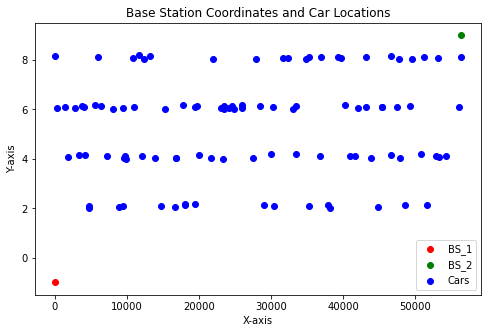

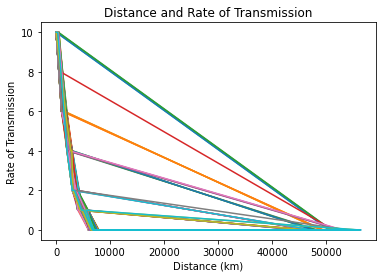

In [2]:
#import relevant library
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(8, 5))

# Plot the base station coordinates
plt.scatter(BS_1[0], BS_1[1], label='BS_1', color='red')
plt.scatter(BS_2[0], BS_2[1], label='BS_2', color='green')

# Add the car coordinates
plt.scatter(coordinate_x, coordinate_y, label='Cars', color='blue')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Base Station Coordinates and Car Locations')
plt.legend()

# Show the plot
plt.show()

# Create a line plot of distance vs transmission rate
plt.plot(dis_car_ij, rate_car_ij)

# Add title and labels
plt.title('Distance and Rate of Transmission')
plt.xlabel('Distance (km)')
plt.ylabel('Rate of Transmission')

# Show the plot
plt.show()

## Implementation of Algorithm

In [7]:
import random

# Constants for Ant Colony Optimization
NUM_ANTS = 10
PHEROMONE_EVAPORATION_RATE = 0.5
ALPHA = 1.0
BETA = 2.0
NUM_GENERATIONS = 100

# assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# calculate the distance between car i and car j
def calculate_distance(coord_x, coord_y):
    num_cars = len(coord_x)
    dis_car_ij = np.zeros((num_cars, num_cars))
    rate_car_ij = np.zeros((num_cars, num_cars))

    for i in range(num_cars):
        for j in range(num_cars):
            dis_car_ij[i][j] = math.sqrt((abs(coord_x[i] - coord_x[j])) ** 2 + (abs(coord_y[i] - coord_y[j])) ** 2)

            # Here is to calculate the transmission rate according to the distance
            if dis_car_ij[i][j] < 500:
                rate_car_ij[i][j] = 10
            elif 500 <= dis_car_ij[i][j] < 1000:
                rate_car_ij[i][j] = 8
            elif 1000 <= dis_car_ij[i][j] < 2000:
                rate_car_ij[i][j] = 6
            elif 2000 <= dis_car_ij[i][j] < 3000:
                rate_car_ij[i][j] = 4
            elif 3000 <= dis_car_ij[i][j] < 4000:
                rate_car_ij[i][j] = 2
            elif 4000 <= dis_car_ij[i][j] < 6000:
                rate_car_ij[i][j] = 1
            elif dis_car_ij[i][j] >= 6000:
                rate_car_ij[i][j] = 0

    # Add a small constant to distances to avoid division by zero
    dis_car_ij += 1e-9

    return dis_car_ij, rate_car_ij


# Function to convert indices to coordinates
def indices_to_coordinates(indices, coord_x, coord_y):
    return [(coord_x[i], coord_y[i]) for i in indices]

# Ant Colony Optimization Functions

def initialize_pheromones(num_nodes):
    return np.ones((num_nodes, num_nodes))

def calculate_probabilities(pheromones, distances, alpha, beta, visited, current_node):
    pheromone = pheromones[current_node] ** alpha
    distance = (1.0 / distances[current_node]) ** beta

    probabilities = pheromone * distance
    probabilities[list(visited)] = 0.0

    probabilities /= probabilities.sum()

    return probabilities


def select_next_node(probabilities):
    return np.random.choice(range(len(probabilities)), p=probabilities)

def fitness(route, distances, rates):
    if len(route) < 2:
        return float('inf'), 0

    min_rate = 10
    total_distance = 0
    for i in range(len(route) - 1):
        rate = rates[route[i]][route[i + 1]]
        min_rate = min(min_rate, rate)
        if rate == 0:
            return float('inf'), 0
        total_distance += distances[route[i]][route[i + 1]]

    latency = total_distance * 50  # Assuming 50 ms per unit distance
    return min_rate, latency

def ant_colony_optimization(distances, rates, num_ants, pheromone_evaporation_rate, alpha, beta, num_generations):
    num_nodes = len(distances)
    pheromones = initialize_pheromones(num_nodes)
    best_route = None
    best_fitness = float('inf')

    for generation in range(num_generations):
        ant_routes = []

        for ant in range(num_ants):
            visited_nodes = set()
            current_node = random.randint(0, num_nodes - 1)
            visited_nodes.add(current_node)
            route = [current_node]

            while len(visited_nodes) < num_nodes:
                probabilities = calculate_probabilities(pheromones, distances[current_node], alpha, beta, visited_nodes, current_node)
                next_node = select_next_node(probabilities)
                visited_nodes.add(next_node)
                route.append(next_node)
                current_node = next_node

            ant_routes.append(route)

        # Update pheromones
        pheromones *= (1.0 - pheromone_evaporation_rate)
        for route in ant_routes:
            pheromone_delta = 1.0 / len(route)
            for i in range(len(route) - 1):
                pheromones[route[i], route[i + 1]] += pheromone_delta
                pheromones[route[i + 1], route[i]] += pheromone_delta

        # Update the best route
        current_best_route = min(ant_routes, key=lambda x: sum(distances[i, j] for i, j in zip(x, x[1:])))
        current_best_fitness = sum(distances[i, j] for i, j in zip(current_best_route, current_best_route[1:]))

        if current_best_fitness < best_fitness:
            best_route = current_best_route
            best_fitness = current_best_fitness

        print(f"Generation {generation + 1}: Best fitness {best_fitness}")

    return best_route

In [8]:
# Code for Running the Experiments and Results with Ant Colony Algorithm:

# Constants for Ant Colony Optimization
NUM_ANTS = 10
PHEROMONE_EVAPORATION_RATE = 0.5
ALPHA = 1.0
BETA = 2.0
NUM_GENERATIONS = 100

# assign coordinates to variables
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# calculate the distance between car i and car j
def calculate_distance(coord_x, coord_y):
    num_cars = len(coord_x)
    dis_car_ij = np.zeros((num_cars, num_cars))
    rate_car_ij = np.zeros((num_cars, num_cars))

    for i in range(num_cars):
        for j in range(num_cars):
            dis_car_ij[i][j] = math.sqrt((abs(coord_x[i] - coord_x[j])) ** 2 + (abs(coord_y[i] - coord_y[j])) ** 2)

            # Here is to calculate the transmission rate according to the distance
            if dis_car_ij[i][j] < 500:
                rate_car_ij[i][j] = 10
            elif 500 <= dis_car_ij[i][j] < 1000:
                rate_car_ij[i][j] = 8
            elif 1000 <= dis_car_ij[i][j] < 2000:
                rate_car_ij[i][j] = 6
            elif 2000 <= dis_car_ij[i][j] < 3000:
                rate_car_ij[i][j] = 4
            elif 3000 <= dis_car_ij[i][j] < 4000:
                rate_car_ij[i][j] = 2
            elif 4000 <= dis_car_ij[i][j] < 6000:
                rate_car_ij[i][j] = 1
            elif dis_car_ij[i][j] >= 6000:
                rate_car_ij[i][j] = 0

    # Add a small constant to distances to avoid division by zero
    dis_car_ij += 1e-9

    return dis_car_ij, rate_car_ij


# Function to convert indices to coordinates
def indices_to_coordinates(indices, coord_x, coord_y):
    return [(coord_x[i], coord_y[i]) for i in indices]

# Ant Colony Optimization Functions

def initialize_pheromones(num_nodes):
    return np.ones((num_nodes, num_nodes))

def calculate_probabilities(pheromones, distances, alpha, beta, visited, current_node):
    pheromone = pheromones[current_node] ** alpha
    distance = (1.0 / distances[current_node]) ** beta

    probabilities = pheromone * distance
    probabilities[list(visited)] = 0.0

    probabilities /= probabilities.sum()

    return probabilities


def select_next_node(probabilities):
    return np.random.choice(range(len(probabilities)), p=probabilities)

def fitness(route, distances, rates):
    if len(route) < 2:
        return float('inf'), 0

    min_rate = 10
    total_distance = 0
    for i in range(len(route) - 1):
        rate = rates[route[i]][route[i + 1]]
        min_rate = min(min_rate, rate)
        if rate == 0:
            return float('inf'), 0
        total_distance += distances[route[i]][route[i + 1]]

    latency = total_distance * 50  # Assuming 50 ms per unit distance
    return min_rate, latency

def ant_colony_optimization(distances, rates, num_ants, pheromone_evaporation_rate, alpha, beta, num_generations):
    num_nodes = len(distances)
    pheromones = initialize_pheromones(num_nodes)
    best_route = None
    best_fitness = float('inf')

    for generation in range(num_generations):
        ant_routes = []

        for ant in range(num_ants):
            visited_nodes = set()
            current_node = random.randint(0, num_nodes - 1)
            visited_nodes.add(current_node)
            route = [current_node]

            while len(visited_nodes) < num_nodes:
                probabilities = calculate_probabilities(pheromones, distances[current_node], alpha, beta, visited_nodes, current_node)
                next_node = select_next_node(probabilities)
                visited_nodes.add(next_node)
                route.append(next_node)
                current_node = next_node

            ant_routes.append(route)

        # Update pheromones
        pheromones *= (1.0 - pheromone_evaporation_rate)
        for route in ant_routes:
            pheromone_delta = 1.0 / len(route)
            for i in range(len(route) - 1):
                pheromones[route[i], route[i + 1]] += pheromone_delta
                pheromones[route[i + 1], route[i]] += pheromone_delta

        # Update the best route
        current_best_route = min(ant_routes, key=lambda x: sum(distances[i, j] for i, j in zip(x, x[1:])))
        current_best_fitness = sum(distances[i, j] for i, j in zip(current_best_route, current_best_route[1:]))

        if current_best_fitness < best_fitness:
            best_route = current_best_route
            best_fitness = current_best_fitness

        print(f"Generation {generation + 1}: Best fitness {best_fitness}")

    return best_route

# Usage for Ant Colony Optimization
distances, rates = calculate_distance(coordinate_x, coordinate_y)
best_ant_route = ant_colony_optimization(distances, rates, NUM_ANTS, PHEROMONE_EVAPORATION_RATE, ALPHA, BETA, NUM_GENERATIONS)

# Convert indices to coordinates for visualization
best_ant_route_coordinates = indices_to_coordinates(best_ant_route, coordinate_x, coordinate_y)

# Print the best route found by Ant Colony Optimization
print("Best Ant Route Indices:", best_ant_route)
print("Best Ant Route Coordinates:", best_ant_route_coordinates)

Generation 1: Best fitness 1826876.3864795025
Generation 2: Best fitness 1620079.1218019698
Generation 3: Best fitness 1575663.867024536
Generation 4: Best fitness 1575663.867024536
Generation 5: Best fitness 1575663.867024536
Generation 6: Best fitness 1575663.867024536
Generation 7: Best fitness 1575663.867024536
Generation 8: Best fitness 1575663.867024536
Generation 9: Best fitness 1575663.867024536
Generation 10: Best fitness 1575663.867024536
Generation 11: Best fitness 1575663.867024536
Generation 12: Best fitness 1575663.867024536
Generation 13: Best fitness 1575663.867024536
Generation 14: Best fitness 1575663.867024536
Generation 15: Best fitness 1575663.867024536
Generation 16: Best fitness 1575663.867024536
Generation 17: Best fitness 1575663.867024536
Generation 18: Best fitness 1575663.867024536
Generation 19: Best fitness 1524014.8221944098
Generation 20: Best fitness 1524014.8221944098
Generation 21: Best fitness 1524014.8221944098
Generation 22: Best fitness 1524014.82

In [9]:
# Code for Running Another Experiment and Results with Ant Colony Algorithm:

import numpy as np
import pandas as pd
import random

# Load CSV file
position_data = pd.read_csv("data_file.csv")
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

# Base station coordinates
BS_1 = (-1, -1)
BS_2 = (56325, 9)

# Calculate distance matrix
dis_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))
rate_car_ij = np.zeros((len(coordinate_x), len(coordinate_x)))

for i in range(len(coordinate_x)):
    for j in range(len(coordinate_x)):
        dis_car_ij[i][j] = np.sqrt((abs(coordinate_x[i] - coordinate_x[j])) ** 2 +
                                   (abs(coordinate_y[i] - coordinate_y[j])) ** 2)

        # Calculate the transmission rate according to the distance
        if dis_car_ij[i][j] < 500:
            rate_car_ij[i][j] = 10
        elif 500 <= dis_car_ij[i][j] < 1000:
            rate_car_ij[i][j] = 8
        elif 1000 <= dis_car_ij[i][j] < 2000:
            rate_car_ij[i][j] = 6
        elif 2000 <= dis_car_ij[i][j] < 3000:
            rate_car_ij[i][j] = 4
        elif 3000 <= dis_car_ij[i][j] < 4000:
            rate_car_ij[i][j] = 2
        elif 4000 <= dis_car_ij[i][j] < 6000:
            rate_car_ij[i][j] = 1
        elif dis_car_ij[i][j] >= 6000:
            rate_car_ij[i][j] = 0

class AntColony:
    def __init__(self, distance_matrix, n_ants, decay, alpha=1, beta=2):
        self.pheromone_matrix = np.ones(distance_matrix.shape) / len(distance_matrix)
        self.all_ants = np.zeros((n_ants, len(distance_matrix)), dtype=int)
        self.distance_matrix = distance_matrix
        self.pheromone_decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self, generations):
        for gen in range(generations):
            self.all_ants = np.array([self.generate_ant() for _ in range(len(self.all_ants))])

            pheromone_delta = np.zeros(self.pheromone_matrix.shape)

            for ant in self.all_ants:
                distance = self.get_total_distance(ant)
                for i in range(1, len(ant)):
                    pheromone_delta[ant[i-1], ant[i]] += 1 / distance

            self.pheromone_matrix = (1 - self.pheromone_decay) * self.pheromone_matrix + pheromone_delta

    def generate_ant(self):
        ant = []
        start_node = random.randint(0, len(self.distance_matrix) - 1)
        ant.append(start_node)

        while len(ant) < len(self.distance_matrix):
            next_node = self.select_next_node(ant)
            ant.append(next_node)

        return ant

    def select_next_node(self, ant):
        current_node = ant[-1]
        available_nodes = [node for node in range(len(self.distance_matrix)) if node not in ant]
        probabilities = self.calculate_probabilities(current_node, available_nodes)
        next_node = np.random.choice(available_nodes, p=probabilities)

        return next_node

    def calculate_probabilities(self, current_node, available_nodes):
        pheromones = self.pheromone_matrix[current_node, available_nodes]
        distances = 1 / self.distance_matrix[current_node, available_nodes]

        total = np.sum(pheromones ** self.alpha * distances ** self.beta)
        probabilities = (pheromones ** self.alpha * distances ** self.beta) / total

        return probabilities

    def get_total_distance(self, ant):
        total_distance = 0
        for i in range(len(ant) - 1):
            total_distance += self.distance_matrix[ant[i], ant[i + 1]]

        return total_distance

# ACO Parameters
n_ants = 50
generations_aco = 100
pheromone_decay = 0.1

# Create AntColony instance and run ACO
aco_colony = AntColony(dis_car_ij, n_ants, pheromone_decay)
aco_colony.run(generations_aco)

# Find the best route in the final pheromone matrix
best_route = np.argmax(aco_colony.pheromone_matrix, axis=1)

print("\nFinal Best Route (ACO):", best_route)
print("Final Best Route Distance:", aco_colony.get_total_distance(best_route))


Final Best Route (ACO): [13 50 52  2  3  4 53  6 54 55 57 10 11 12 13 58 15 59 60 61 62 62 63 64
 64 66 66 68 70 71 31 73 74 76 35 77 79 38 81 83 41 84 85 44 87 88 89 48
 91 92  0  1 51  5  7  8  9 56 14 16 17 18 20 22 23 24 25 26 27 70 28 29
 30 32 75 33 34 35 79 36 37 82 39 40 85 42 43 44 45 90 47 49 93 94 95 96
 97 98 99 98]
Final Best Route Distance: 168287.5057341822


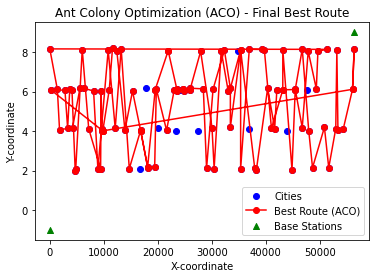

In [10]:
# Create a function to visualize the final best routing path for Ant Colony Algorithm

import matplotlib.pyplot as plt

# Plotting the points
plt.scatter(coordinate_x, coordinate_y, label='Cities', color='blue')

# Plotting the best route obtained from ACO
best_route_x = [coordinate_x[i] for i in best_route]
best_route_y = [coordinate_y[i] for i in best_route]
best_route_x.append(best_route_x[0])  # Connect the last point to the first to form a closed loop
best_route_y.append(best_route_y[0])
plt.plot(best_route_x, best_route_y, linestyle='-', marker='o', color='red', label='Best Route (ACO)')

# Plotting the base stations
bs_x = [BS_1[0], BS_2[0]]
bs_y = [BS_1[1], BS_2[1]]
plt.scatter(bs_x, bs_y, marker='^', color='green', label='Base Stations')

# Adding labels and legend
plt.title('Ant Colony Optimization (ACO) - Final Best Route')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()

# Display the plot
plt.show()